In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df=pd.read_csv('economic_index.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

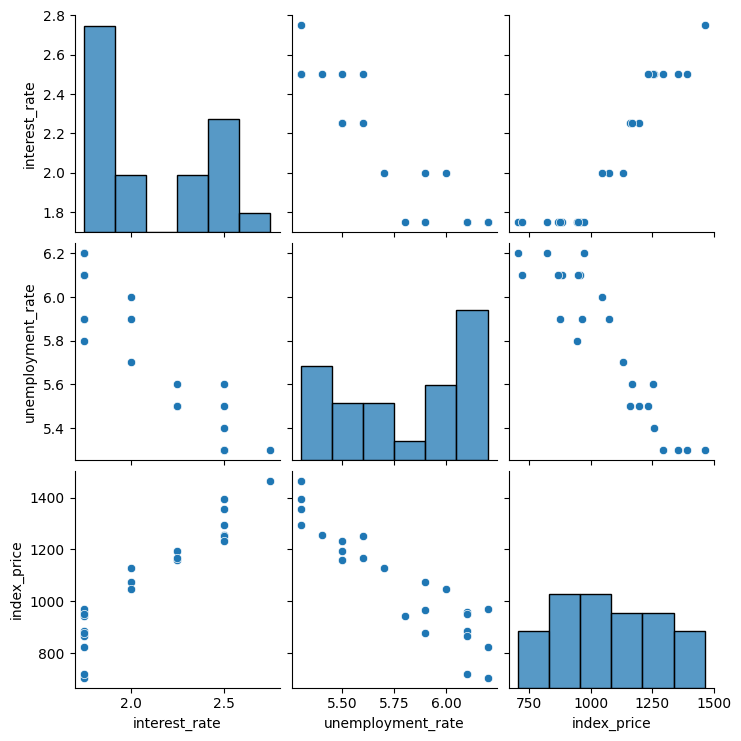

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [10]:
# X=df[['interest_rate','unemployment_rate']]
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

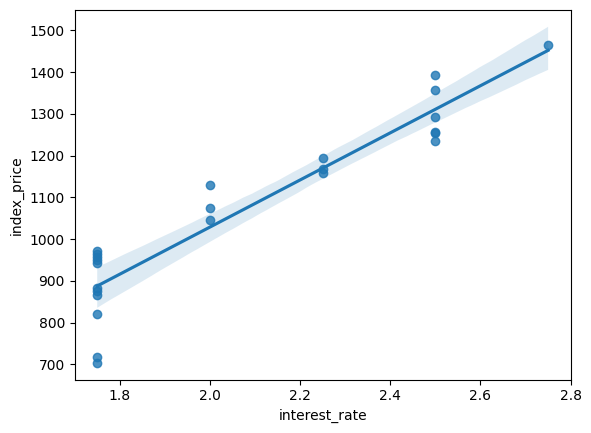

In [13]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

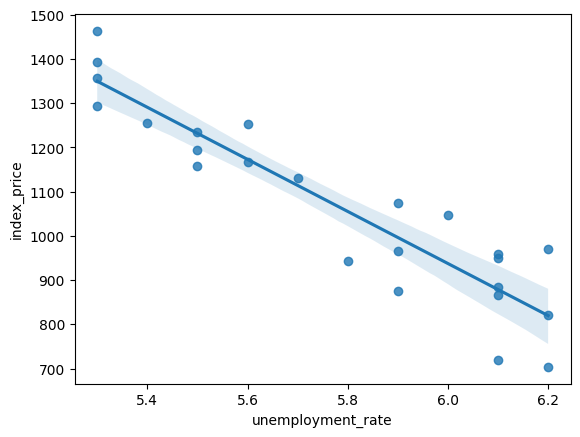

In [14]:
sns.regplot(x='unemployment_rate', y='index_price', data=df)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [18]:
regression.fit(X_train,Y_train)

LinearRegression()

CROSS VALIDATION <BR>
dividing the training data itselfin train and test data <br>eg 900 train data cv=5 so in <br>cv=1 [180 test][train][train][train][train] <br>cv=2 [train][180 test][train][train][train]



In [20]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3))

np.float64(-5914.828180162386)

more towards 0 more accurate

predictions

In [21]:
y_pred=regression.predict(X_test)

In [22]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [24]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print("r-square",score)
adj=1-((1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print("adj",adj)


r-square 0.8278978091457145
adj 0.7131630152428576


Assumptions

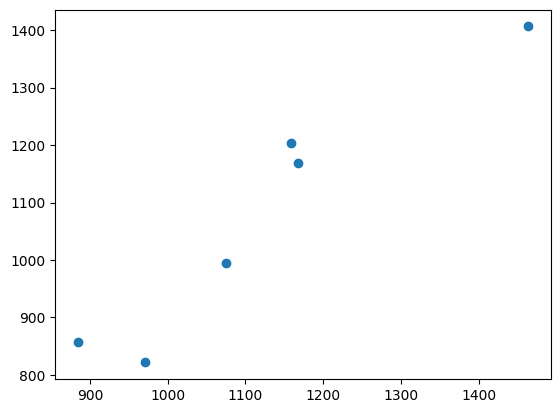

In [25]:
plt.scatter(Y_test,y_pred)

linear it means model performed well

In [26]:
residuals=Y_test-y_pred

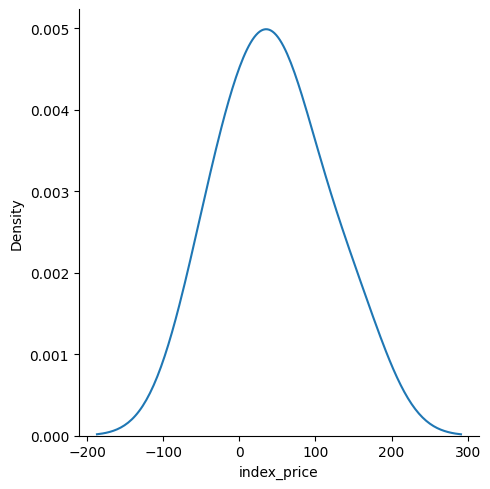

In [27]:
#plot residuals
sns.displot(residuals,kind='kde')

normal distribution model good

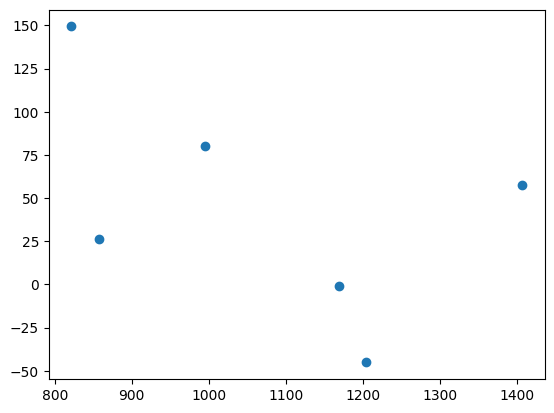

In [28]:
# residuals and prediction
plt.scatter(y_pred,residuals)

its distributed normally without any pattern so no problem with model

## OLS

In [29]:
import statsmodels.api as sm

In [30]:
model=sm.OLS(Y_train,X_train).fit()

In [31]:
model.summary()

c:\Users\Shruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                       0.754
Time:                        16:24:37   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
